In [ ]:
"""
ToDo:

- Find a more elegant way of filtering na rows in Ex8a.

"""

In [86]:
import re
import pandas as pd
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
import seaborn as sns
sns.set() # Setting seaborn as default style even if use only matplotlib
sns.set(rc={'figure.figsize':(20,15)})

# Chapter 3

### Exercise 8

In [4]:
# LOAD DATASET
auto_df = pd.read_csv('./data/auto.csv')

# DATA WRANGLING
auto_df[auto_df['horsepower'].str.match(r'[^0-9]')]
auto_df['horsepower'].replace(r'[^0-9]', '', regex = True,  inplace = True)
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'])
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'])

# DATA INSPECTION
auto_df.info()
auto_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


##### a) Linear model: mpg on horsepower

mpg = 39.94 -0.16 * horsepower
R^2 = 0.61


[Text(0.5, 0, 'horsepower'), Text(0, 0.5, 'mpg')]

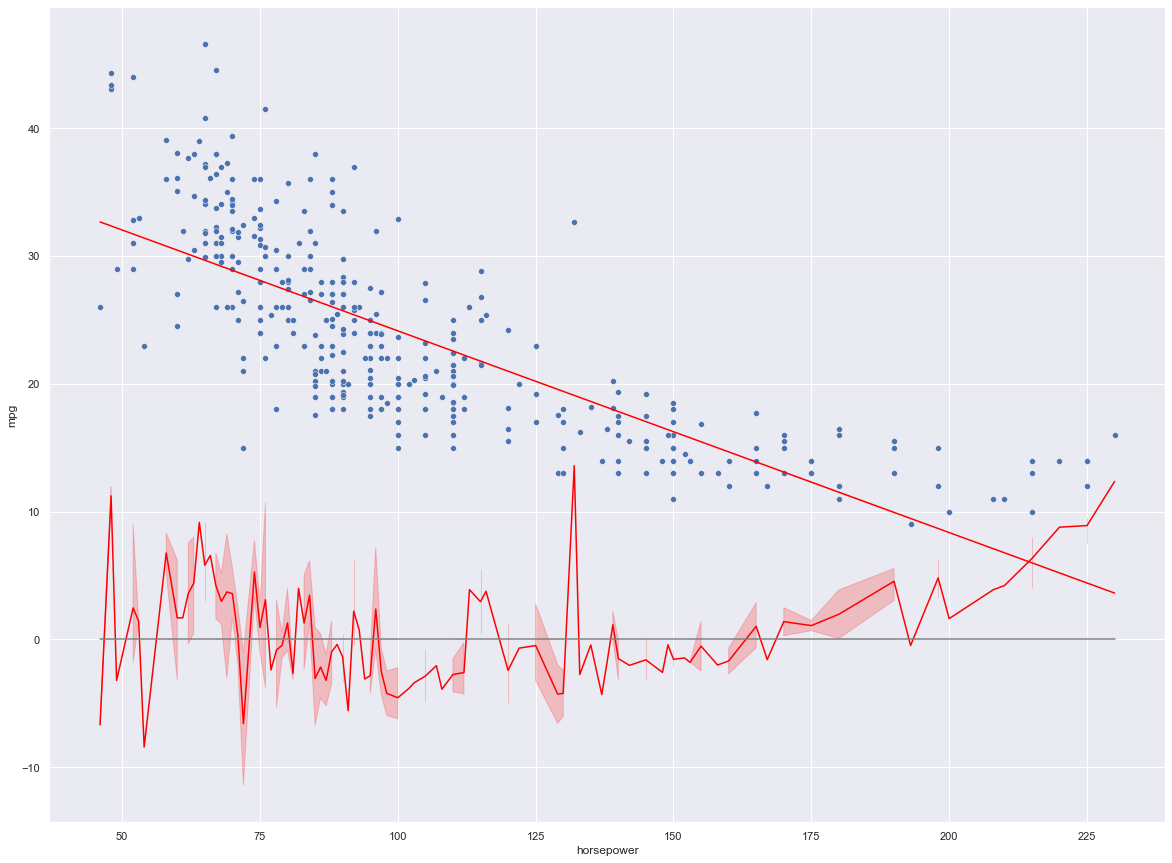

In [90]:
def plot(model, X, Y):
    """
    Plots the data, the line of best fit and the residuals.
    """
    Y_pred = model.predict(X)
    residuals =  residuals = [y - y_pred for y, y_pred in zip(Y, Y_pred)]
    
    fig, axes = plt.subplots(2, 1)
    
    fig.suptitle('Linear regression summary plots')
    axes[0].set_title('Data and line of best fit')
    axes[1].set_title('Residuals plot')
    
    sns.scatterplot(x = X, y = Y)
    sns.lineplot(ax = axes[0], x = X, y = Y_pred)
    sns.scatterplot(ax = axes[1], x = X, y = residuals)

# Set response and predictor.
auto_df = auto_df.dropna()
X = auto_df['horsepower'].values.reshape(-1,1)
y = auto_df['mpg'].values.reshape(-1,1)

# Fit
simple_linear_model_ex8a = LinearRegression().fit(X, y)

# Results
print('mpg = {intercept:.2f} {slope:.2f} * horsepower'.format(intercept = simple_linear_model_ex8a.intercept_[0], slope = simple_linear_model_ex8a.coef_[0][0]))
print('R^2 = {R_2:.2f}'.format(R_2 = simple_linear_model_ex8a.score(X,y)))

# Plots
Y_pred = simple_linear_model_ex8a.intercept_[0] + auto_df['horsepower'] * simple_linear_model_ex8a.coef_[0][0]
fig_1 = sns.lineplot(x = auto_df['horsepower'], y = Y_pred, color = 'red')
sns.scatterplot(x = auto_df['horsepower'], y = auto_df['mpg'])
sns.lineplot(x = auto_df['horsepower'], y = auto_df['mpg'] - Y_pred, color = 'red') # residuals
sns.lineplot(x = auto_df['horsepower'], y = auto_df['mpg'] * 0, color = 'grey') # zero line
fig_1.set(xlabel='horsepower', ylabel='mpg')